In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
from scipy import signal
import pandas as pd
import statsmodels.stats.diagnostic as sm
from obspy.signal.detrend import polynomial
import statsmodels

In [161]:
dados = sc.loadmat('series_chl_sst_v2.mat')
chl_P1 = dados['chl_P1'][0:828,:]
chl_P2 = dados['chl_P2']
chl_P3 = dados['chl_P3']
chl_P4 = dados['chl_P4']
sst_P1 = dados['sst_P1'][0:644,:]
sst_P2 = dados['sst_P2']
sst_P3 = dados['sst_P3']
sst_P4 = dados['sst_P4']
timeC = np.linspace(start=1,stop=18,num=828)
timeS = np.linspace(start=1,stop=18,num=644)
plt.style.use('ggplot')

(0.0, 600.0)

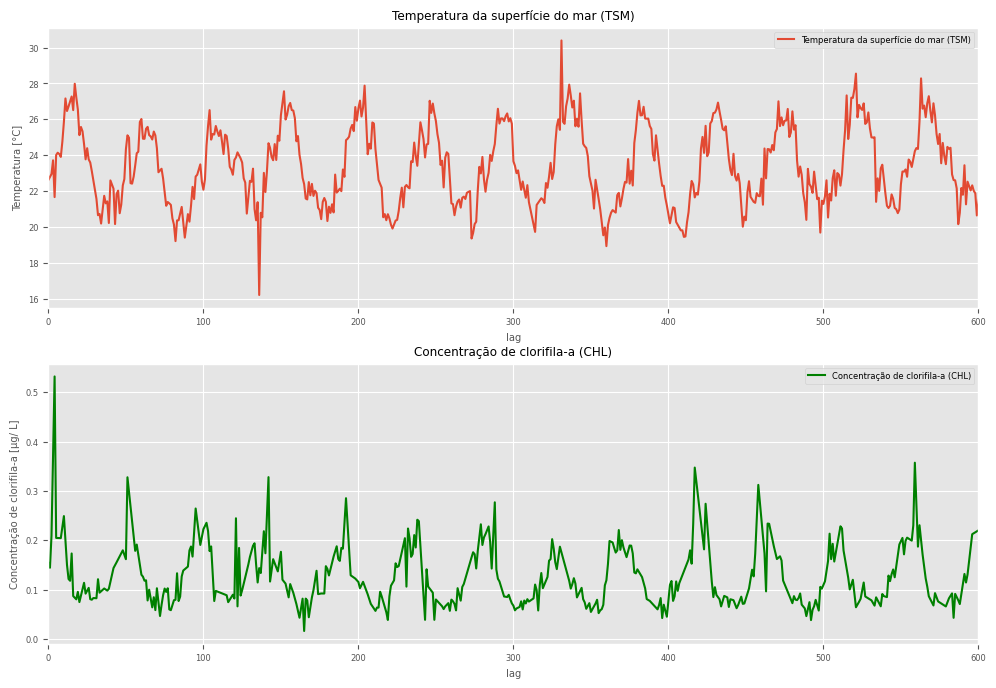

In [105]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})
plt.subplot(211)
plt.plot(sst_P1,label='Temperatura da superfície do mar (TSM)')
plt.title('Temperatura da superfície do mar (TSM)')
plt.ylabel('Temperatura [°C]')
plt.xlabel('lag')
plt.xlim(0,600)
plt.legend()
plt.subplot(212)
plt.plot(chl_P1,label='Concentração de clorifila-a (CHL)',color='green')
plt.title('Concentração de clorifila-a (CHL)')
plt.ylabel('Concentração de clorifila-a [μg/ L]')
plt.xlabel('lag')
plt.legend()
plt.xlim(0,600)


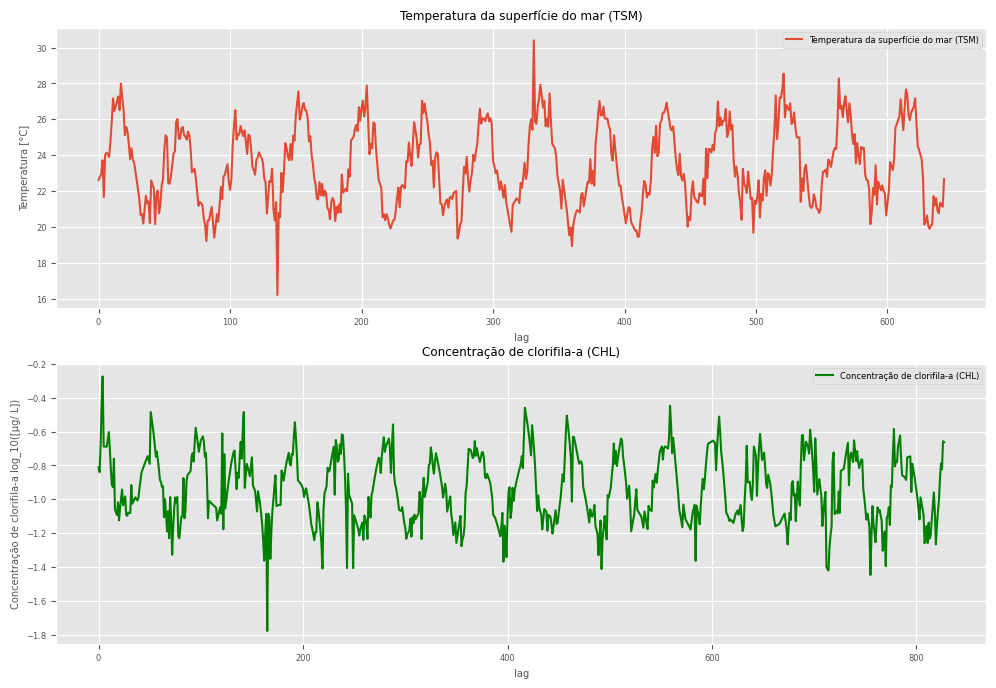

In [106]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(sst_P1,label='Temperatura da superfície do mar (TSM)')
plt.title('Temperatura da superfície do mar (TSM)')
plt.ylabel('Temperatura [°C]')
plt.xlabel('lag')
plt.legend()
plt.subplot(212)
plt.plot(np.log10(chl_P1),label='Concentração de clorifila-a (CHL)',color='green')
plt.title('Concentração de clorifila-a (CHL)')
plt.ylabel('Concentração de clorifila-a log_10([μg/ L])')
plt.xlabel('lag')
plt.legend()


In [107]:
detredssh=statsmodels.tsa.tsatools.detrend(sst_P1, order=3, axis=0)
detredchl=statsmodels.tsa.tsatools.detrend(np.log10(chl_P1), order=3, axis=0)

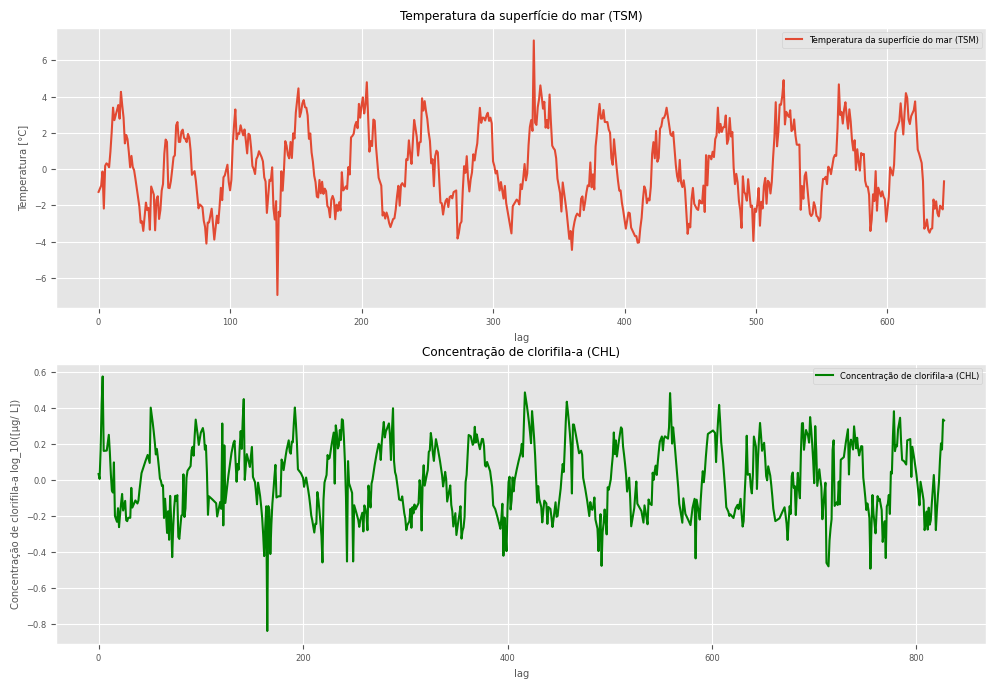

In [108]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(detredssh,label='Temperatura da superfície do mar (TSM)')
plt.title('Temperatura da superfície do mar (TSM)')
plt.ylabel('Temperatura [°C]')
plt.xlabel('lag')
plt.legend()
plt.subplot(212)
plt.plot(detredchl,label='Concentração de clorifila-a (CHL)',color='green')
plt.title('Concentração de clorifila-a (CHL)')
plt.ylabel('Concentração de clorifila-a log_10([μg/ L])')
plt.xlabel('lag')
plt.legend()
plt.legend()

In [109]:
def calculate_fourier_coeff(y):
    y = np.array(y)
    N = len(y)
    A = np.zeros(N//2)
    B = np.zeros(N//2)
    T = np.zeros(N//2)
    f = np.zeros(N//2)
    
    for p in range(1, N//2 + 1):
        Alpha = 0
        Beta = 0
        for n in range(N):
            Alpha += (2/N) * (y[n] * np.cos((2 * np.pi * n * p) / N))
            Beta += (2/N) * (y[n] * np.sin((2 * np.pi * n * p) / N))
        A[p-1] = Alpha
        B[p-1] = Beta
        T[p-1] = N / p
        f[p-1] = p / N
    
    Ao = 2 * np.mean(y)
    A = np.insert(A, 0, Ao)
    B = np.insert(B, 0, 0)
    f = np.insert(f, 0, np.nan)
    T = np.insert(T, 0, np.nan)
    C = np.sqrt(A**2 + B**2)
    theta = np.arctan2(B, A)
    theta = np.degrees(theta)
    theta[0] = np.nan
    
    return A, B, C, theta, f, T

def calculate_fourier_series2(A, B, f, N):
    A = np.array(A)
    B = np.array(B)
    f = np.array(f)
    A = A.reshape(-1, 1)
    B = B.reshape(-1, 1)
    Ao = A[0]
    Na = len(A)
    Nb = len(B)
    if Na != Nb:
        raise ValueError('A and B must be the same size')
    y = np.zeros((Na, N))
    i = np.arange(1, N+1)
    for p in range(Na):
        y[p, :] = y[p, :] + A[p] * np.cos(2 * np.pi * f[p] * i) + B[p] * np.sin(2 * np.pi * f[p] * i)
    Y = 0.5 * Ao + np.sum(y, axis=0)
    return y, Y

In [110]:
At, Bt, Ct, thetat, ft, Tt = calculate_fourier_coeff(sst_P1)
Ac, Bc, Cc, thetac, fc, Tc = calculate_fourier_coeff(chl_P1)

In [111]:
Atx = np.argsort(At)[::-1][:6]
Atx

array([ 0,  4, 10, 67,  6,  1])

In [112]:
At[Atx]

array([46.78200206,  0.23004915,  0.20168221,  0.15827286,  0.15221472,
        0.15094963])

In [113]:
Btx = np.argsort(Bt)[::-1][:6]
Btx

array([14,  6, 20, 17, 22, 55])

In [114]:
Bt[Btx]

array([2.22623559, 0.21330429, 0.1962461 , 0.1616022 , 0.16145243,
       0.14340388])

In [115]:
Acx = np.argsort(Ac)[::-1][:6]
Acx

array([ 0, 18, 25,  6, 34, 12])

In [116]:
Ac[Acx]

array([0.25626171, 0.05891033, 0.00597877, 0.00562355, 0.00560137,
       0.00515924])

In [117]:
Bcx = np.argsort(Bc)[::-1][:6]
Bcx

array([18, 36, 30, 46,  2, 49])

In [118]:
Bc[Bcx]

array([0.03443252, 0.01480117, 0.00588837, 0.00580585, 0.0053072 ,
       0.0050731 ])

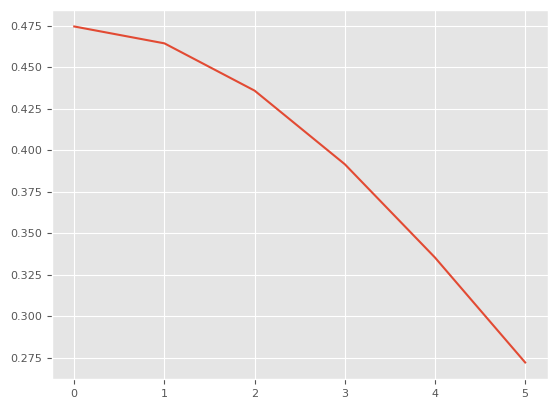

In [141]:
y,Y = calculate_fourier_series2(Ac[Acx],Bc[Bcx],ft[Bcx],N=len(Ac[Acx]))
plt.plot(Y)

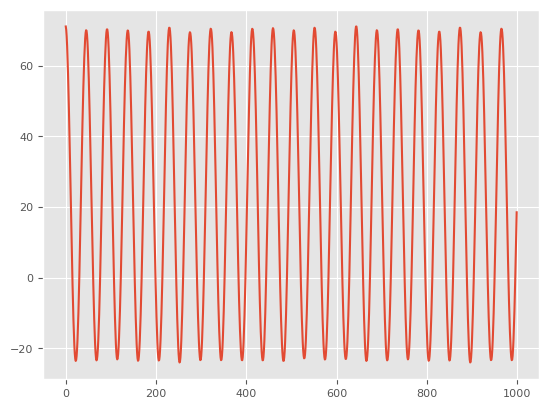

In [140]:
y,Y = calculate_fourier_series2(At[Atx],Bt[Btx],ft[Btx],N=1000)
plt.plot(Y)

In [150]:
# Defina seus coeficientes A_n e B_n e outras informações
A0 = 0.5
# Coeficiente médio
An = Ac[Acx]
Bn = Bc[Bcx]
N = len(Ac[Acx]) # Número de termos na série
T = 97
# Defina os valores de tempo onde deseja calcular a série
tempo = timeC
# Calcule a série de Fourier
serie_temporal_reconstruidaC6 = A0 / 2.0
for n in range(1, N + 1):
    serie_temporal_reconstruidaC6 += An[n - 1] * np.cos(2 * np.pi * n * tempo / T) + Bn[n - 1] * np.sin(2 * np.pi * n * tempo / T)


In [184]:
# Defina seus coeficientes A_n e B_n e outras informações
# Coeficiente médio
An = Ac
Bn = Bc
N = len(Ac) # Número de termos na série
T = 1/(timeC[1]-timeC[0])
A0 = np.sum((1 / T) * np.trapz(chl_P1, dx=timeC[1]-timeC[0]))
# Defina os valores de tempo onde deseja calcular a série
tempo = timeC
# Calcule a série de Fourier
serie_temporal_reconstruidaC = A0 / 2.0
for n in range(1, N + 1):
    serie_temporal_reconstruidaC += An[n - 1] * np.cos(2 * np.pi * n * tempo / T) + Bn[n - 1] * np.sin(2 * np.pi * n * tempo / T)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


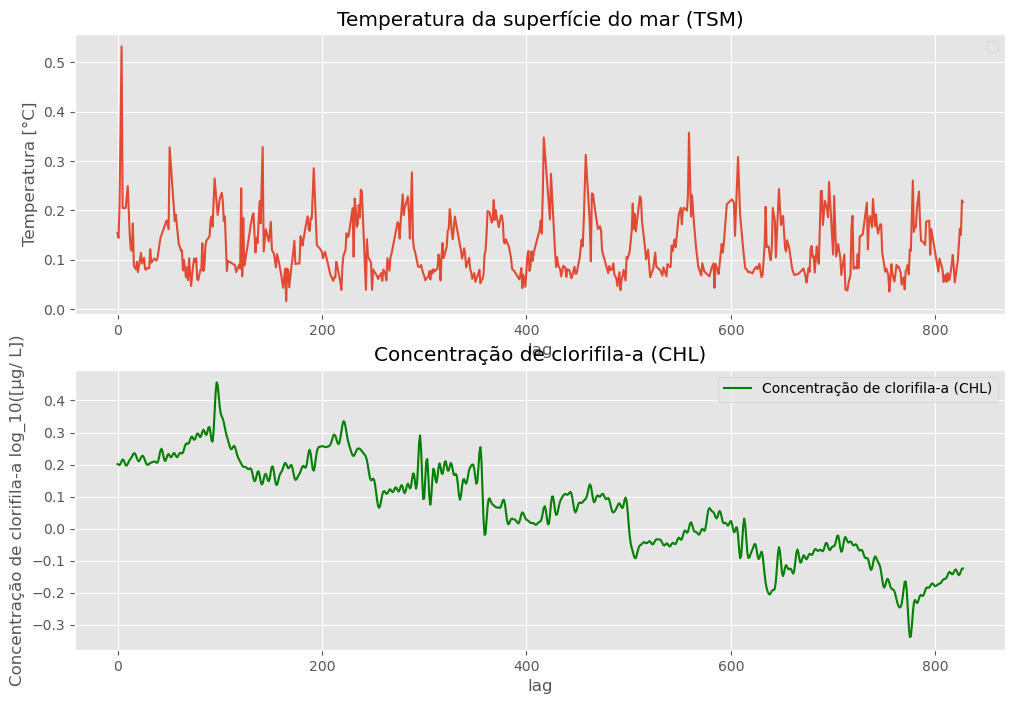

In [185]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(chl_P1)
plt.title('Temperatura da superfície do mar (TSM)')
plt.ylabel('Temperatura [°C]')
plt.xlabel('lag')
plt.legend()
plt.subplot(212)
plt.plot(serie_temporal_reconstruidaC,label='Concentração de clorifila-a (CHL)',color='green')
plt.title('Concentração de clorifila-a (CHL)')
plt.ylabel('Concentração de clorifila-a log_10([μg/ L])')
plt.xlabel('lag')
plt.legend()
plt.legend()